最小二乘拟合一次函数

<class 'numpy.ndarray'> <class 'list'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(array([0.99218424, 2.60905047]), 2)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


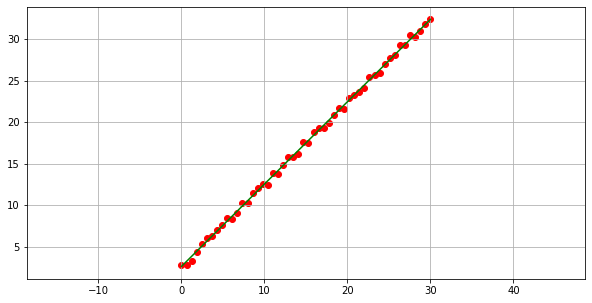

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

def func(abc,x):
    y=abc[0]*x+abc[1]
    print(type(x),type(abc))
#     print(abc[1])
#     print('X:',x)
#     print(y.shape)
#     print('Y:',y)
    return y

def loss(abc,x,y):
    return y-func(abc,x)

# 准备数据，x和带噪声的y
abc=[1,2]
x=np.linspace(0,30,50)
noise=[np.random.random() for _ in range(50)]
y_noise=func(abc,x)+noise

# 开始拟合
# 初始化拟合参数
fit_param=[1,2]
# 最小二乘，目标就是使loss的值最小，这里要注意顺序，和loss中的顺序应该一致
para=leastsq(loss,fit_param,args=(x,y_noise))
print(para)
y_fitted=func(para[0],x)
# 绘图
plt.figure(figsize=(10, 5), facecolor='w')

plt.grid(b=True)
plt.axis('equal')

plt.scatter(x,y_noise,color='r')
plt.plot(x,y_fitted,color='g')

最小二乘拟合二次曲线

(array([-1.98932163,  4.917177  ,  9.49888217]), 1)


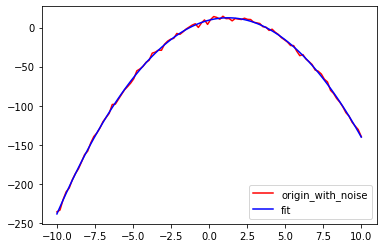

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

# 创建一元二次函数的值
def func(abc,x):
    return abc[0]*x**2+abc[1]*x+abc[2]

# 损失函数
def error(abc,x,y):
    return func(abc,x)-y;

# 创建一元二次函数的拟合参数
x=np.linspace(-10,10,100)
# 原始的abc参数 y=ax^2+bx+c
abc=[-2,5,10]
# 创建噪声
noise=np.random.randn(len(x))
# 将噪声加入到正常的y值中
y=func(abc,x)+noise*2

fit_init_param=[0.1,-0.1,100]
para=leastsq(error,fit_init_param,args=(x,y))

y_fitted=func(para[0],x)

plt.plot(x,y,'r',label='origin_with_noise')
plt.plot(x,y_fitted,'-b',label='fit')
plt.legend()
print(para)


多项式拟合 下边的似乎有问题

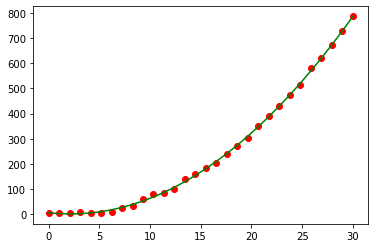

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
def func(abc,x):
    y=abc[0]*x**2+abc[1]*x+abc[2]
    return y

abc=[1,-4,5]
x=np.linspace(0,30,30)
# 下边的random必须加for，否则维数不对
# noise=[np.random.random() for _ in range(30)]
#
noise=np.random.randn(len(x))
y_noise=func(abc,x)-noise*5

a=np.polyfit(x,y_noise,deg=2)
b=np.poly1d(a)
# np.poly1d
y_fitted=func(a,x)
# y_fitted=b(x)
# print(a)
# print(b)

plt.scatter(x,y_noise,color='r')
plt.plot(x,y_fitted,color='g')